<a href="https://colab.research.google.com/github/raulbenitez/NEUROIMAGING_AI/blob/main/Feature%20extraction/propietats_blobs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Generem una imatge amb blobs artificials:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  


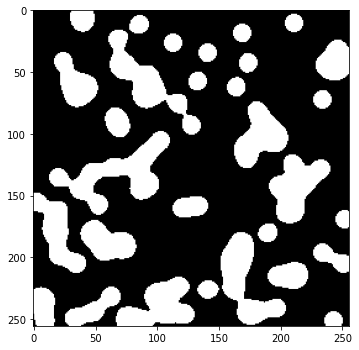

In [1]:
from skimage import data, measure
import skimage as sk 
import matplotlib.pyplot as plt

blobs = data.binary_blobs(length=256, blob_size_fraction=0.1,volume_fraction=0.3)
IG = sk.color.rgb2gray(blobs) 

fig = plt.figure(figsize=(5,5))
plt.imshow(IG,cmap='gray')
plt.tight_layout()
plt.show()

Segmentem, etiquetem regions i visualitzem:

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  # This is added back by InteractiveShellApp.init_path()


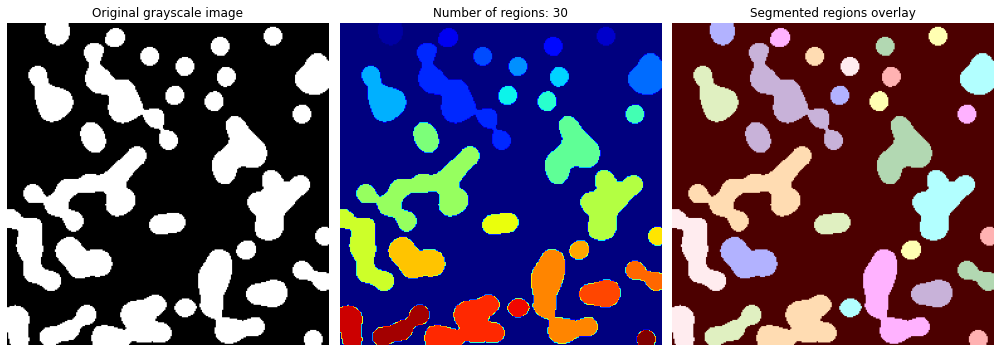

In [2]:
from skimage.filters import threshold_otsu
from skimage.measure import label
from skimage.color import label2rgb

# Apply Otsu threshold for segmentation :
thresh = threshold_otsu(IG)
bw = IG > thresh # keep lighter regions with grayscale intensities above threshold

# label image regions:
label_image, nregions = label(bw,return_num=True)
image_label_overlay = label2rgb(label_image, image=IG)

# Get some figures:
fig, axes = plt.subplots(1,3,figsize=(14, 9))
ax = axes.ravel()
ax[0].imshow(IG,cmap=plt.cm.gray)
ax[0].set_title('Original grayscale image') 
ax[1].imshow(label_image,cmap=plt.cm.jet)
ax[1].set_title('Number of regions: {}'.format(nregions)) # set figure title
ax[2].imshow(image_label_overlay,cmap=plt.cm.jet)
ax[2].set_title('Segmented regions overlay') 

ax[0].set_axis_off()
ax[1].set_axis_off()
ax[2].set_axis_off()
plt.tight_layout()
plt.show()

Obtenir les propietats en forma de pandas dataframe

In [3]:
import pandas as pd

props = measure.regionprops_table(label_image,properties=['label','area','eccentricity','extent'])

df_propietats = pd.DataFrame(props)
df_propietats.head()


,label,area,eccentricity,extent
0,1,300,0.456626,0.833333
1,2,177,0.000000,0.786667
2,3,191,0.437686,0.795833
3,4,178,0.150518,0.791111
4,5,1808,0.964257,0.283608


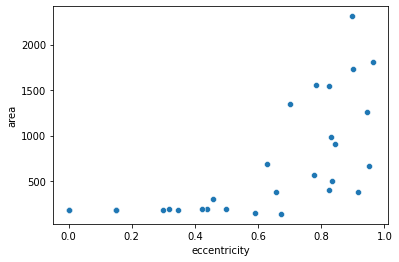

In [4]:
import seaborn as sns

sns.scatterplot(x='eccentricity',y='area',data=df_propietats)

In [11]:
props1 = measure.regionprops_table(label_image,properties=['label','major_axis_length','minor_axis_length','eccentricity','area'])

df_propietats1 = pd.DataFrame(props1)
df_propietats1['ratio'] = df_propietats1['major_axis_length'].values/df_propietats1['minor_axis_length'].values
df_propietats1.head()

,label,major_axis_length,minor_axis_length,eccentricity,area,ratio
0,1,20.951911,18.640047,0.456626,300,1.124027
1,2,14.996798,14.996798,0.000000,177,1.000000
2,3,16.448298,14.789123,0.437686,191,1.112189
3,4,15.126951,14.954613,0.150518,178,1.011524
4,5,109.551495,29.027692,0.964257,1808,3.774034


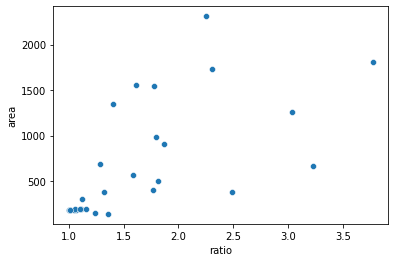

In [12]:
sns.scatterplot(x='ratio',y='area',data=df_propietats1)